In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
model = linear_model.LinearRegression()

$f(x_1,x_2,...,x_n) = b + c_1\cdot x_1 + ... + c_n\cdot x_n$

$b$ = intercept

In [7]:
a = pd.DataFrame({
    "max_speed": [150,200,280,130],
    "engine": [2.0,2.5,1.8,1.6],
    "age": [18,13,0,1],
    "price": [5000,8000,20000,13000],
})

In [8]:
a

,max_speed,engine,age,price
0,150,2.0,18,5000
1,200,2.5,13,8000
2,280,1.8,0,20000
3,130,1.6,1,13000


In [9]:
model.fit(a[["max_speed","engine","age"]],a["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([   48.07272727, -3301.81818182,  -449.45454545])

In [11]:
model.intercept_

12482.90909090911

In [12]:
12482 + 150*48 - 2.0*3300 - 18*450

4982.0

In [14]:
12482 + 200*48 - 2.5*3300 - 13*450

7982.0

In [15]:
12482 + 280*48 - 1.8*3300 - 0*450

19982.0

$f(x) = 25 + 10x_1 + 20x_2 - 35x_3$

In [26]:
df = pd.DataFrame({
    "x1": [20,40,20,1,-4,5,19,20,21,20],
    "x2": [1,0,1,1,0,1,1,0,0,1],
    "x3": [200,230,210,100,130,200,230,210,100,130],
})
df["y"] = (25 - 10*df["x1"] + 20*df["x2"] + 35*df["x3"])*10

In [27]:
df

,x1,x2,x3,y
0,20,1,200,68450
1,40,0,230,76750
2,20,1,210,71950
3,1,1,100,35350
4,-4,0,130,46150
5,5,1,200,69950
6,19,1,230,79050
7,20,0,210,71750
8,21,0,100,33150
9,20,1,130,43950


In [28]:
model.fit(df[["x1","x2","x3"]],df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
model.coef_

array([-100.,  200.,  350.])

In [30]:
model.intercept_

250.0000000000291

In [31]:
new_apts = pd.DataFrame({
    "x1": [10,5,-3,4],
    "x2": [1,0,0,1],
    "x3": [80,110,135,400],    
})

In [33]:
model.predict(new_apts[["x1","x2","x3"]])

array([ 27450.,  38250.,  47800., 140050.])

$f(x) = 25 - 10x_1 + 20x_2 + 35x_3 + 2x_1x_3 + x_3^2$

In [42]:
df = pd.DataFrame({
    "x1": [20,40,20,1,-4,5,19,20,21,20],
    "x2": [1,0,1,1,0,1,1,0,0,1],
    "x3": [200,230,210,100,130,200,230,210,100,130],
})
df["y"] = 25 - 10*df["x1"] + 20*df["x2"] + 35*df["x3"] + 2*df["x1"]*df["x3"] + df["x3"]**2

In [43]:
df

,x1,x2,x3,y
0,20,1,200,54845
1,40,0,230,78975
2,20,1,210,59695
3,1,1,100,13735
4,-4,0,130,20475
5,5,1,200,48995
6,19,1,230,69545
7,20,0,210,59675
8,21,0,100,17515
9,20,1,130,26495


In [44]:
model.fit(df[["x1","x2","x3"]],df["y"])
new_apts = pd.DataFrame({
    "x1": [20,40,20],
    "x2": [1,0,1],
    "x3": [200,230,210],
})
model.predict(new_apts[["x1","x2","x3"]])

array([56249.09475639, 76515.25255459, 60158.81941834])

In [45]:
df

,x1,x2,x3,y
0,20,1,200,54845
1,40,0,230,78975
2,20,1,210,59695
3,1,1,100,13735
4,-4,0,130,20475
5,5,1,200,48995
6,19,1,230,69545
7,20,0,210,59675
8,21,0,100,17515
9,20,1,130,26495


## Feature Engineering

In [49]:
df["x1_x3"] = df["x1"] * df["x2"]
new_apts["x1_x3"] = new_apts["x1"] * new_apts["x2"]
model.fit(df.drop(["y"],axis=1),df["y"])
model.predict(new_apts)

array([55469.74831717, 77661.78133224, 59402.77491434])

In [51]:
df["x1_x3"] = df["x1"] * df["x2"]
new_apts["x1_x3"] = new_apts["x1"] * new_apts["x2"]
df["super"] = df["x3"]**2
new_apts["super"] = new_apts["x3"]**2

model.fit(df.drop(["y"],axis=1),df["y"])
model.predict(new_apts)

array([54464.58069848, 77636.59323727, 59506.87035377])

In [72]:
df = pd.DataFrame({
    "x": np.linspace(-20,20,50),
    "y": 1.4*np.linspace(-20,20,50)**2 + 4*np.linspace(-20,20,50) + np.random.randn(50)*40
})

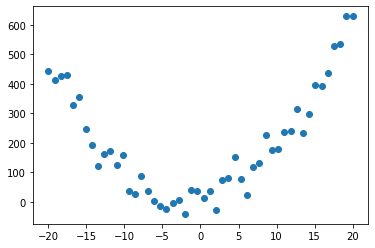

In [73]:
plt.scatter(df["x"],df["y"])

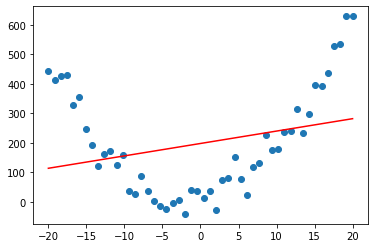

In [74]:
model.fit(df[["x"]],df["y"])
plt.scatter(df["x"],df["y"])
plt.plot(np.linspace(-20,20,50),model.predict(np.linspace(-20,20,50).reshape(50,1)),c="red")

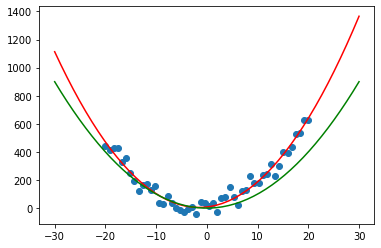

In [76]:
df["x2"] = df["x"]**2
model.fit(df[["x","x2"]],df["y"])
plt.scatter(df["x"],df["y"])
pred=pd.DataFrame({
    "x": np.linspace(-30,30,50),
    "x2": np.linspace(-30,30,50)**2,
})
plt.plot(pred["x"],model.predict(pred),c="red")
plt.plot(pred["x"],pred["x2"],c="green")

In [77]:
np.linspace(-30,30,50)

array([-30.        , -28.7755102 , -27.55102041, -26.32653061,
       -25.10204082, -23.87755102, -22.65306122, -21.42857143,
       -20.20408163, -18.97959184, -17.75510204, -16.53061224,
       -15.30612245, -14.08163265, -12.85714286, -11.63265306,
       -10.40816327,  -9.18367347,  -7.95918367,  -6.73469388,
        -5.51020408,  -4.28571429,  -3.06122449,  -1.83673469,
        -0.6122449 ,   0.6122449 ,   1.83673469,   3.06122449,
         4.28571429,   5.51020408,   6.73469388,   7.95918367,
         9.18367347,  10.40816327,  11.63265306,  12.85714286,
        14.08163265,  15.30612245,  16.53061224,  17.75510204,
        18.97959184,  20.20408163,  21.42857143,  22.65306122,
        23.87755102,  25.10204082,  26.32653061,  27.55102041,
        28.7755102 ,  30.        ])